In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 数据描述

In [8]:
data = pd.read_csv("E:\Code\Jupyter Notebook Code\数学建模\9980.csv",encoding='gb18030').iloc[:,1:]
data

,常住人口（万人）,总量,第三产业（亿元）,固定资产投资额（亿元）,社会消费品零售总额
0,7810.27,160967,13660.89,18949.88000,11807.16
1,7869.34,188558,17121.03,23184.28000,13990.35
2,8022.99,212594,20699.22,26314.66000,16511.02
3,8119.81,231295,23309.75,31706.58000,18946.41
4,8192.44,194048,26752.50,35982.52000,21504.90
5,8281.09,208623,30174.27,41552.75000,24176.13
6,8315.11,211648,33931.69,45905.17000,26710.13
7,8381.47,215651,38269.57,49370.85000,29612.50
8,8423.50,234092,42700.49,53000.21000,32818.24
9,8446.19,247388,46936.47,55915.22155,35472.62


In [9]:
data.describe()

,常住人口（万人）,总量,第三产业（亿元）,固定资产投资额（亿元）,社会消费品零售总额
count,12.000000,12.00000,12.000000,12.000000,12.000000
mean,8234.046667,222869.75000,33196.980000,41632.684828,25525.669167
std,233.108850,36704.90263,13459.390122,14220.770417,9121.485156
min,7810.270000,160967.00000,13660.890000,18949.880000,11807.160000
25%,8095.605000,204979.25000,22657.117500,30358.600000,18337.562500
50%,8298.100000,214122.50000,32052.980000,43728.960000,25443.130000
75%,8429.172500,237416.00000,43759.485000,53728.962888,33481.835000
max,8477.260000,288513.00000,53955.830000,58943.198540,37672.510000


In [12]:
label = data.iloc[:,1]
factor = data.drop('总量',axis=1)

In [14]:
factor.corr(method='pearson')

,常住人口（万人）,第三产业（亿元）,固定资产投资额（亿元）,社会消费品零售总额
常住人口（万人）,1.000000,0.949111,0.983057,0.967775
第三产业（亿元）,0.949111,1.000000,0.985287,0.994588
固定资产投资额（亿元）,0.983057,0.985287,1.000000,0.995259
社会消费品零售总额,0.967775,0.994588,0.995259,1.000000


# 多元线性回归模型（OLS）

In [15]:
import statsmodels.api as sm

In [33]:
label_train = data.iloc[:-2,1].to_numpy().reshape(-1,1)
label_predict = data.iloc[-2:,1].to_numpy().reshape(-1,1)
factor_train = factor.iloc[:-2,:].to_numpy()
factor_predic =  factor.iloc[-2:,:].to_numpy()

Y=label_train
X=factor_train
X=sm.add_constant(X) # 添加截距项

In [46]:
factor_predic.shape

(2, 4)

In [35]:
model = sm.OLS(Y,X).fit()

In [36]:
from scipy.stats import f,t
F_Theroy = f.ppf(q=0.95,dfn = 3,dfd = 30-3-1)
F_Theroy

2.9751539639733933

In [37]:
T_Theroy = t.ppf(q=0.975,df=30-3-1)
T_Theroy

2.055529438642871

In [47]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     4.598
Date:                Tue, 14 Dec 2021   Prob (F-statistic):             0.0626
Time:                        01:31:34   Log-Likelihood:                -107.18
No. Observations:                  10   AIC:                             224.4
Df Residuals:                       5   BIC:                             225.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.805e+06    1.1e+06     -1.644      0.161   -4.63e+06    1.02e+06
x1           268.7023    148.003      1.816      0.129    -111.751     649.155
x2            25.1197     24.182      1.039      0.347     -37.042      87.281
x3            -4.8242      7.537     -0.640      0.550     -24.198      14.550
x4           -31.8395     42.718     -0.745      0.490    -141.651      77.972
==============================================================================
Omnibus:                        3.616   Durbin-Watson:                   3.092
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                1.094
Skew:                           0.774   Prob(JB):                        0.579
Kurtosis:                       3.480   Cond. No.                     1.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
#模型的拟合值
factor_train_predic = sm.add_constant(factor_train) # 添加截距项
z = model.predict(factor_train_predic).reshape(-1,1)

In [66]:
y = np.concatenate((z,y_train_pred.reshape(-1,1)),axis=0)

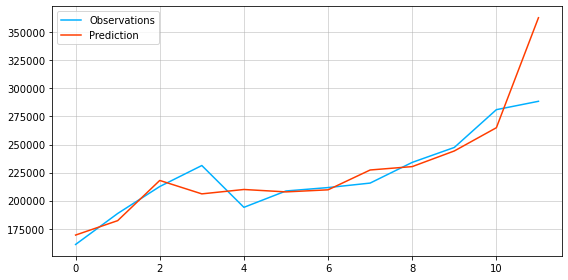

In [67]:
#绘制最佳拟合线：标签用的是训练数据的预测值y_train_pred
plt.figure(figsize=(8,4))
plt.plot(label,color='#00b0ff',label="Observations",linewidth=1.5)
plt.plot(y,color='#ff3d00',label="Prediction",linewidth=1.5)
plt.legend(loc="upper left")
plt.grid(alpha=0.6)
plt.tight_layout()

In [54]:
y_train_pred

array([264970.59233921, 362953.64831249])

In [55]:
label_predict

array([[281060],
       [288513]], dtype=int64)